In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import numpy as np
import re
import json
from nltk.corpus import stopwords
import Utils.plot as plot_helper
import Utils.dataframe as dataframe_helper
import Utils.dict as dict_helper
import Utils.calculate as calculate

In [3]:
TOP_WORDS = 1000
N = 10
NUMBER_OF_SELECTED_WORDS = None
TEXT_COL = 'short_description'

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [5]:
# df = dataframe_helper.load_data()
# df = dataframe_helper.data_cleaning(df)
# df = dataframe_helper.over_sampling(df=df, target='flagged')
# df = df[['reviewContent', 'flagged']]
# df['flagged'].replace({'Y': 'Fake', 'N':'Genuine'}, inplace=True)

# fake_df = df[df['flagged'] == 'Fake'].reset_index(drop=True)
# genuine_df = df[df['flagged'] == 'Genuine'].reset_index(drop=True)
# all_df = pd.concat([fake_df, genuine_df]).reset_index(drop=True)

In [6]:
# df = pd.read_csv('../Data/BBC/BBC_News_Train.csv')

# sport_df = df[df['Category'] == 'sport']
# sport_df.reset_index(drop=True, inplace=True)

# tech_df = df[df['Category'] == 'tech']
# tech_df.reset_index(drop=True, inplace=True)

# all_df = pd.concat([sport_df, tech_df])
# all_df.reset_index(drop=True, inplace=True)


In [7]:
df = pd.read_json('../Data/News/News_Category_Dataset_v3.json', lines=True)
df[TEXT_COL] = df[TEXT_COL].apply(lambda x: x.lower())

sport_df = df[df['category'] == 'SPORTS']
sport_df.reset_index(drop=True, inplace=True)

tech_df = df[df['category'] == 'TECH']
tech_df.reset_index(drop=True, inplace=True)

all_df = pd.concat([sport_df, tech_df])
all_df.reset_index(drop=True, inplace=True)


In [8]:
text_string_fake = dataframe_helper.get_str_from_df(sport_df, 10, TEXT_COL)
text_string_genuine = dataframe_helper.get_str_from_df(tech_df, 10, TEXT_COL)

In [9]:
# text_string_fake = dataframe_helper.get_str_from_df(fake_df, 10, 'reviewContent')
# text_string_genuine = dataframe_helper.get_str_from_df(genuine_df, 10, 'reviewContent')

In [10]:
# with open ('../Data/book/cook_book.txt', 'r', encoding='utf-8' ) as f:
#      text_string_fake = f.read().lower()

# with open ('../Data/book/ml_book.txt', 'r', encoding='utf-8' ) as f:
#      text_string_genuine = f.read().lower()

# zipf distribution
- from zipf's law most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

    ![Zipf_distribution_CMF](../Picture/Zipf_distribution_CMF.png "Zipf_distribution_CMF") 
    
    Zipf_distribution_CMF

    ![Zipf_distribution_PMF](../Picture/Zipf_distribution_PMF.png "Zipf_distribution_PMF") 
    
    Zipf_distribution_PMF

In [11]:
dict_fake = dict_helper.get_most_frequent(text_string_fake, remove_stop_word=False)
dict_helper.print_most_frequent(dict_fake)

the: 4699: 1.0
and: 1144: 4.11
for: 683: 6.88
that: 602: 7.81
was: 509: 9.23
his: 488: 9.63
with: 437: 10.75
this: 424: 11.08
you: 318: 14.78
have: 315: 14.92
has: 297: 15.82
are: 285: 16.49
not: 280: 16.78
but: 272: 17.28
from: 259: 18.14
game: 256: 18.36
all: 233: 20.17
will: 230: 20.43
they: 229: 20.52
after: 226: 20.79
one: 214: 21.96
team: 213: 22.06
first: 206: 22.81
said: 205: 22.92
just: 194: 24.22
about: 187: 25.13
their: 186: 25.26
who: 177: 26.55
been: 173: 27.16
time: 170: 27.64
more: 167: 28.14
out: 166: 28.31
nfl: 161: 29.19
new: 161: 29.19
can: 161: 29.19
what: 160: 29.37
football: 160: 29.37
like: 157: 29.93
when: 156: 30.12
sports: 151: 31.12
over: 148: 31.75
two: 147: 31.97
year: 147: 31.97
there: 137: 34.3
world: 134: 35.07
were: 128: 36.71
players: 123: 38.2
win: 121: 38.83
league: 118: 39.82
had: 115: 40.86
its: 109: 43.11
than: 108: 43.51
against: 107: 43.92
season: 107: 43.92
some: 106: 44.33
back: 105: 44.75
she: 103: 45.62
him: 99: 47.46
into: 98: 47.95
player:

In [12]:
dict_genuine = dict_helper.get_most_frequent(text_string_genuine, remove_stop_word=False)
dict_helper.print_most_frequent(dict_genuine)

the: 2078: 1.0
and: 743: 2.8
that: 419: 4.96
you: 409: 5.08
for: 390: 5.33
with: 232: 8.96
this: 212: 9.8
are: 211: 9.85
apple: 173: 12.01
have: 171: 12.15
has: 163: 12.75
but: 158: 13.15
new: 157: 13.24
week: 147: 14.14
was: 140: 14.84
can: 139: 14.95
from: 135: 15.39
not: 135: 15.39
will: 130: 15.98
your: 126: 16.49
its: 120: 17.32
more: 119: 17.46
facebook: 114: 18.23
about: 112: 18.55
they: 112: 18.55
most: 110: 18.89
one: 108: 19.24
google: 108: 19.24
what: 106: 19.6
their: 102: 20.37
company: 99: 20.99
all: 99: 20.99
social: 94: 22.11
look: 94: 22.11
our: 91: 22.84
just: 88: 23.61
people: 87: 23.89
see: 83: 25.04
time: 81: 25.65
said: 80: 25.98
how: 80: 25.98
world: 77: 26.99
who: 76: 27.34
out: 75: 27.71
could: 73: 28.47
twitter: 70: 29.69
there: 70: 29.69
get: 69: 30.12
when: 67: 31.01
been: 67: 31.01
again: 67: 31.01
looking: 67: 31.01
some: 66: 31.48
than: 66: 31.48
popular: 64: 32.47
technology: 64: 32.47
tech: 64: 32.47
internet: 64: 32.47
youtube: 63: 32.98
now: 62: 33.52


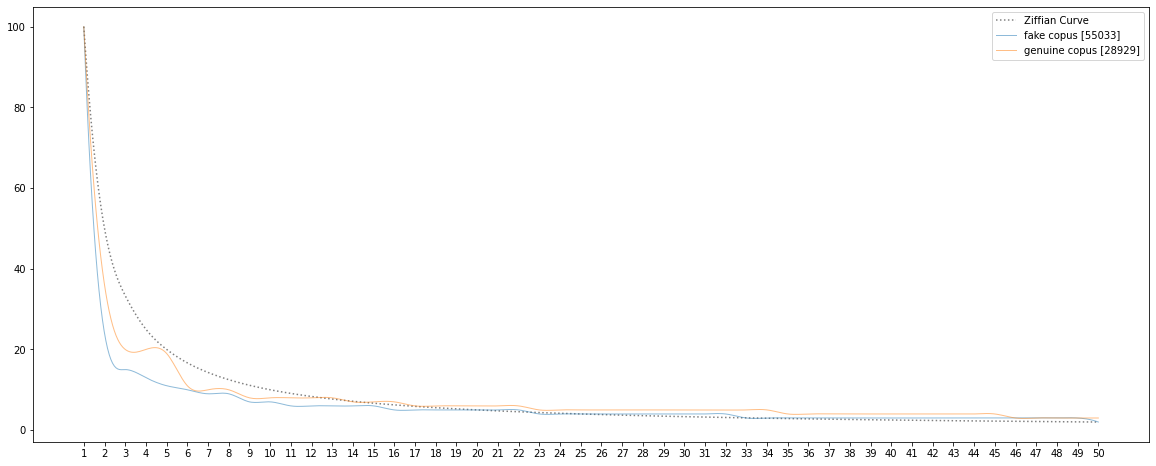

In [13]:
combined_dict = {'fake copus':dict_fake, 'genuine copus':dict_genuine}
plot_helper.zipf_plot(combined_dict, 50, 20, 8)

In [14]:
# with stop words
common_keys = dict_fake.keys() & dict_genuine.keys()
common_dict_fake = {key: dict_fake[key] for key in common_keys}
common_dict_fake = dict(sorted(common_dict_fake.items(), key=lambda elem: elem[1], reverse=True))
common_dict_genuine = {key: dict_genuine[key] for key in common_dict_fake.keys()}

# with stop words
sum_fake = sum(list(common_dict_fake.values()))
sum_genuine = sum(list(common_dict_genuine.values()))

# with stop words
words_list = list(common_dict_fake.keys())[:NUMBER_OF_SELECTED_WORDS]
prob_common_dict_fake = [x/sum_fake for x in list(common_dict_fake.values())[:NUMBER_OF_SELECTED_WORDS]]
prob_common_dict_genuine = [x/sum_genuine for x in list(common_dict_genuine.values())[:NUMBER_OF_SELECTED_WORDS]]

In [15]:
# calculate the kl divergence
kl_pq = calculate.kl_divergence(prob_common_dict_fake, prob_common_dict_genuine)
print('KL(P || Q): %.3f bits' % kl_pq)
kl_qp = calculate.kl_divergence(prob_common_dict_genuine, prob_common_dict_fake)
print('KL(Q || P): %.3f bits' % kl_qp)

delta_words = calculate.delta_kl_divergence_list(prob_common_dict_fake, prob_common_dict_genuine)

positive_deltas = [x for x in delta_words if x >= 0]
positive_indexs = [i for i,x in enumerate(delta_words) if x >= 0]
positive_words = [words_list[i] for i in positive_indexs]

negative_deltas = [x for x in delta_words if x < 0]
negative_indexs = [i for i,x in enumerate(delta_words) if x < 0]
negative_words = [words_list[i] for i in negative_indexs]

KL(P || Q): 0.555 bits
KL(Q || P): 0.674 bits


In [16]:
dict_helper.print_word_and_delta(positive_words, positive_deltas)

word: delta_KL
the: 0.07440864611148541
for: 0.00039217102425775723
was: 0.018849308719160435
his: 0.03176095637906615
with: 0.0023171490829482534
this: 0.0037960829223290457
have: 0.0012257728577811646
has: 0.0009469271347467378
not: 0.003099740002283126
from: 0.001668544229416835
game: 0.019696731016590023
all: 0.004175715414633258
will: 0.00028900336624187865
they: 0.0023465075662491173
after: 0.010954857893934723
one: 0.001797586110807733
team: 0.02405910187690838
first: 0.009185535337029422
said: 0.004538917192822451
just: 0.0028073231308561033
their: 0.0006025487863416327
who: 0.003076277060303634
been: 0.003893398748011575
time: 0.001996582441303187
out: 0.0024379100670444465
like: 0.0041306864469057925
when: 0.002709251165580741
over: 0.0046352228364806205
year: 0.004562469279075091
two: 0.005644022582963128
there: 0.001049099215202682
world: 1.985889225506339e-05
were: 0.0030749555035176506
players: 0.013748057220587069
win: 0.010929689704863538
had: 0.002531240641494901
again

In [17]:
dict_helper.print_comporison(positive_words, common_dict_fake, common_dict_genuine)

the:fake -> 0.11046593633927312, genuine -> 0.0848267134751194 : fake
for:fake -> 0.016056232074850723, genuine -> 0.015920316773482466 : fake
was:fake -> 0.011965771780525648, genuine -> 0.005714985508429604 : fake
his:fake -> 0.011472095538107104, genuine -> 0.0023268155284320528 : fake
with:fake -> 0.010273167520804927, genuine -> 0.009470547413969058 : fake
this:fake -> 0.009967558418355353, genuine -> 0.008654120912764829 : fake
have:fake -> 0.007405143636278151, genuine -> 0.006980446585296158 : fake
has:fake -> 0.006981992571347971, genuine -> 0.006653875984814467 : fake
not:fake -> 0.006582349898913912, genuine -> 0.005510878883128546 : fake
from:fake -> 0.006088673656495369, genuine -> 0.005510878883128546 : fake
game:fake -> 0.006018148479007005, genuine -> 0.0008164265012042291 : fake
all:fake -> 0.00547745545159622, genuine -> 0.004041311180960934 : fake
will:fake -> 0.005406930274107856, genuine -> 0.005306772257827489 : fake
they:fake -> 0.005383421881611735, genuine -> 0

In [18]:
dict_helper.print_word_and_delta(negative_words, negative_deltas)

word: delta_KL
and: -0.009928004494936787
that: -0.008543374969782105
you: -0.02802022044562986
are: -0.0055499324405634196
but: -0.00016010148292669216
about: -0.0005076600881639992
more: -0.002698866197932222
new: -0.007745768463670989
can: -0.005525685466857003
what: -0.0016349856427963357
its: -0.006974916661763922
than: -0.000448235769039716
some: -0.0005840623318317381
now: -0.0009962006570125301
how: -0.00329854803963431
most: -0.007496966153032905
get: -0.002454881611543975
don: -0.0009178409500704942
your: -0.010382159879466038
people: -0.005447889289222051
our: -0.006132019680706005
could: -0.0038876519690468226
week: -0.01427213920428651
only: -0.0011455181337158042
may: -0.0013336058152525017
again: -0.0033575579038267337
here: -0.0019028938377455506
make: -0.00047431917603875666
these: -0.00035625493739261836
should: -0.0005424065973261803
says: -0.0005604122630167431
take: -0.0006286255122627659
many: -0.0010540819555813533
think: -0.0003599964874785129
look: -0.008555946

In [19]:
dict_helper.print_comporison(negative_words, common_dict_fake, common_dict_genuine)

and:fake -> 0.026893601015562554, genuine -> 0.03033024451973711 : genuine
that:fake -> 0.01415205228266491, genuine -> 0.0171041352002286 : genuine
you:fake -> 0.007475668813766515, genuine -> 0.016695921949626484 : genuine
are:fake -> 0.006699891861394518, genuine -> 0.008613299587704617 : genuine
but:fake -> 0.006394282758944944, genuine -> 0.00644976935951341 : genuine
about:fake -> 0.004396069396774649, genuine -> 0.004571988406743683 : genuine
more:fake -> 0.0039259015468522266, genuine -> 0.004857737682165163 : genuine
new:fake -> 0.0037848511918754995, genuine -> 0.006408948034453198 : genuine
can:fake -> 0.0037848511918754995, genuine -> 0.005674164183369392 : genuine
what:fake -> 0.0037613427993793786, genuine -> 0.004327060456382414 : genuine
its:fake -> 0.0025624147820772014, genuine -> 0.004898559007225374 : genuine
than:fake -> 0.0025389063895810806, genuine -> 0.002694207453973956 : genuine
some:fake -> 0.0024918896045888384, genuine -> 0.002694207453973956 : genuine
now

In [20]:
delta_words_dict = {words_list[i]: delta_words[i] for i in range(len(delta_words))}
delta_words_dict = dict(sorted(delta_words_dict.items(), key=lambda elem: elem[1], reverse=True))

In [21]:
delta_words_dict

{'the': 0.07440864611148541,
 'his': 0.03176095637906615,
 'team': 0.02405910187690838,
 'game': 0.019696731016590023,
 'was': 0.018849308719160435,
 'players': 0.013748057220587069,
 'after': 0.010954857893934723,
 'win': 0.010929689704863538,
 'player': 0.010136847761305646,
 'athletes': 0.010125976026524203,
 'first': 0.009185535337029422,
 'season': 0.008789901939088438,
 'teams': 0.008515613078674364,
 'olympic': 0.008317174405552425,
 'star': 0.008177714185199782,
 'fans': 0.00805400612488153,
 'field': 0.007210325916794255,
 'olympics': 0.00710837425724557,
 'games': 0.006872485855902544,
 'bowl': 0.006668066390388468,
 'gold': 0.006195385555914084,
 'him': 0.006095473269640772,
 'during': 0.006074149026612849,
 'she': 0.006017199990588896,
 'second': 0.0057994269306187686,
 'two': 0.005644022582963128,
 'against': 0.005408856467537446,
 'her': 0.005291266062900879,
 'saturday': 0.0046828806790746285,
 'over': 0.0046352228364806205,
 'national': 0.004633198378755455,
 'play': 0.

P=1.000 Q=1.000


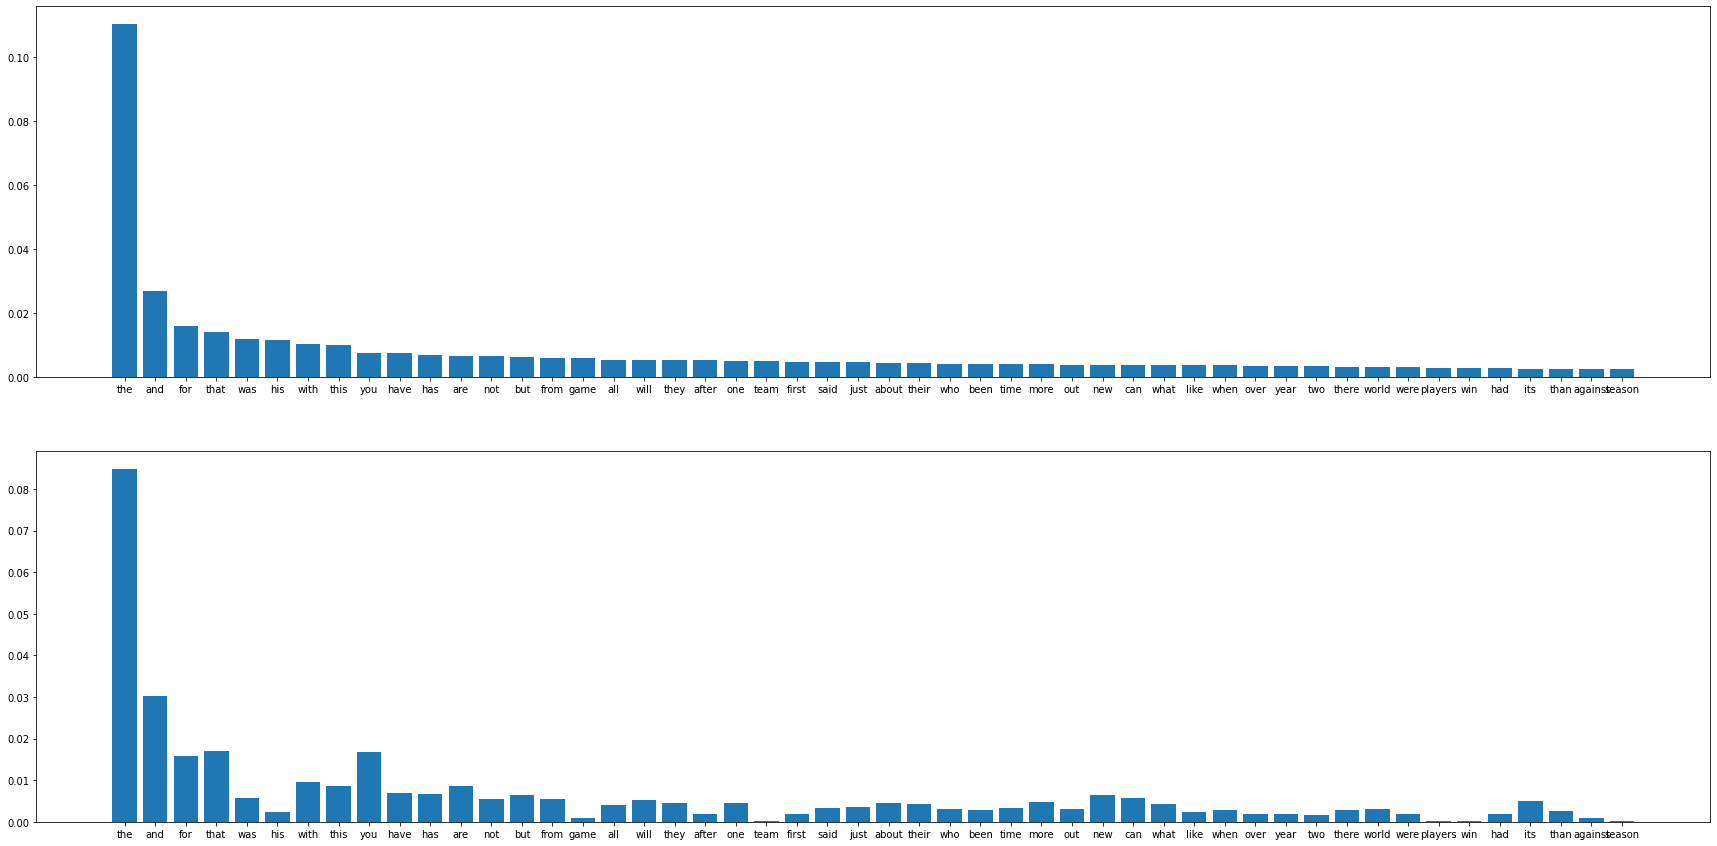

In [22]:
plot_helper.plot_words_distribution(prob_common_dict_fake, prob_common_dict_genuine, words_list, 30, 15, 50)

In [23]:
abs_delta_words_dict = {words_list[i]: abs(delta_words[i]) for i in range(len(delta_words))}
abs_delta_words_dict = dict(sorted(abs_delta_words_dict.items(), key=lambda elem: elem[1], reverse=True))

top_words = list(abs_delta_words_dict.keys())[:TOP_WORDS]

In [24]:
for i in top_words:
    print(f'{i}: {delta_words_dict[i]}')

the: 0.07440864611148541
apple: -0.058319962294224495
facebook: -0.03568207055082144
his: 0.03176095637906615
you: -0.02802022044562986
team: 0.02405910187690838
game: 0.019696731016590023
company: -0.019423333247730077
was: 0.018849308719160435
tech: -0.015415326172271529
youtube: -0.015119221332973458
social: -0.014429128206934457
week: -0.01427213920428651
videos: -0.013944127089334178
players: 0.013748057220587069
users: -0.011068584109637285
after: 0.010954857893934723
win: 0.010929689704863538
technology: -0.010631610893700991
mobile: -0.010443951821787664
your: -0.010382159879466038
bringing: -0.010251862571628271
player: 0.010136847761305646
athletes: 0.010125976026524203
and: -0.009928004494936787
popular: -0.009295305382073842
first: 0.009185535337029422
looking: -0.008904883881787002
season: 0.008789901939088438
further: -0.008652837756979727
look: -0.00855594687861664
that: -0.008543374969782105
teams: 0.008515613078674364
olympic: 0.008317174405552425
star: 0.0081777141851

In [25]:
top_words_fake = {i:delta_words_dict[i] for i in top_words if delta_words_dict[i] > 0}
top_words_genuine = {i:delta_words_dict[i] for i in top_words if delta_words_dict[i] < 0}

In [26]:
top_words = {i:delta_words_dict[i] for i in top_words}

In [27]:
top_words

{'the': 0.07440864611148541,
 'apple': -0.058319962294224495,
 'facebook': -0.03568207055082144,
 'his': 0.03176095637906615,
 'you': -0.02802022044562986,
 'team': 0.02405910187690838,
 'game': 0.019696731016590023,
 'company': -0.019423333247730077,
 'was': 0.018849308719160435,
 'tech': -0.015415326172271529,
 'youtube': -0.015119221332973458,
 'social': -0.014429128206934457,
 'week': -0.01427213920428651,
 'videos': -0.013944127089334178,
 'players': 0.013748057220587069,
 'users': -0.011068584109637285,
 'after': 0.010954857893934723,
 'win': 0.010929689704863538,
 'technology': -0.010631610893700991,
 'mobile': -0.010443951821787664,
 'your': -0.010382159879466038,
 'bringing': -0.010251862571628271,
 'player': 0.010136847761305646,
 'athletes': 0.010125976026524203,
 'and': -0.009928004494936787,
 'popular': -0.009295305382073842,
 'first': 0.009185535337029422,
 'looking': -0.008904883881787002,
 'season': 0.008789901939088438,
 'further': -0.008652837756979727,
 'look': -0.00

In [28]:
top_words_fake

{'the': 0.07440864611148541,
 'his': 0.03176095637906615,
 'team': 0.02405910187690838,
 'game': 0.019696731016590023,
 'was': 0.018849308719160435,
 'players': 0.013748057220587069,
 'after': 0.010954857893934723,
 'win': 0.010929689704863538,
 'player': 0.010136847761305646,
 'athletes': 0.010125976026524203,
 'first': 0.009185535337029422,
 'season': 0.008789901939088438,
 'teams': 0.008515613078674364,
 'olympic': 0.008317174405552425,
 'star': 0.008177714185199782,
 'fans': 0.00805400612488153,
 'field': 0.007210325916794255,
 'olympics': 0.00710837425724557,
 'games': 0.006872485855902544,
 'bowl': 0.006668066390388468,
 'gold': 0.006195385555914084,
 'him': 0.006095473269640772,
 'during': 0.006074149026612849,
 'she': 0.006017199990588896,
 'second': 0.0057994269306187686,
 'two': 0.005644022582963128,
 'against': 0.005408856467537446,
 'her': 0.005291266062900879,
 'saturday': 0.0046828806790746285,
 'over': 0.0046352228364806205,
 'national': 0.004633198378755455,
 'play': 0.

In [29]:
top_words_genuine

{'apple': -0.058319962294224495,
 'facebook': -0.03568207055082144,
 'you': -0.02802022044562986,
 'company': -0.019423333247730077,
 'tech': -0.015415326172271529,
 'youtube': -0.015119221332973458,
 'social': -0.014429128206934457,
 'week': -0.01427213920428651,
 'videos': -0.013944127089334178,
 'users': -0.011068584109637285,
 'technology': -0.010631610893700991,
 'mobile': -0.010443951821787664,
 'your': -0.010382159879466038,
 'bringing': -0.010251862571628271,
 'and': -0.009928004494936787,
 'popular': -0.009295305382073842,
 'looking': -0.008904883881787002,
 'further': -0.008652837756979727,
 'look': -0.00855594687861664,
 'that': -0.008543374969782105,
 'see': -0.007892963078734518,
 'companies': -0.007795751293295088,
 'internet': -0.007795575249977616,
 'new': -0.007745768463670989,
 'data': -0.007527749610945419,
 'most': -0.007496966153032905,
 'twitter': -0.0074465758045890755,
 'digital': -0.007412017122870802,
 'phone': -0.0072687683567494565,
 'its': -0.00697491666176

In [30]:
stop = stopwords.words('english')

In [31]:
pure_top_words = {i[0]:i[1] for i in top_words.items() if i[0] not in stop}
pure_top_words

{'apple': -0.058319962294224495,
 'facebook': -0.03568207055082144,
 'team': 0.02405910187690838,
 'game': 0.019696731016590023,
 'company': -0.019423333247730077,
 'tech': -0.015415326172271529,
 'youtube': -0.015119221332973458,
 'social': -0.014429128206934457,
 'week': -0.01427213920428651,
 'videos': -0.013944127089334178,
 'players': 0.013748057220587069,
 'users': -0.011068584109637285,
 'win': 0.010929689704863538,
 'technology': -0.010631610893700991,
 'mobile': -0.010443951821787664,
 'bringing': -0.010251862571628271,
 'player': 0.010136847761305646,
 'athletes': 0.010125976026524203,
 'popular': -0.009295305382073842,
 'first': 0.009185535337029422,
 'looking': -0.008904883881787002,
 'season': 0.008789901939088438,
 'look': -0.00855594687861664,
 'teams': 0.008515613078674364,
 'olympic': 0.008317174405552425,
 'star': 0.008177714185199782,
 'fans': 0.00805400612488153,
 'see': -0.007892963078734518,
 'companies': -0.007795751293295088,
 'internet': -0.007795575249977616,


In [32]:
pure_top_words_fake = {i[0]:i[1] for i in top_words_fake.items() if i[0] not in stop}
pure_top_words_fake

{'team': 0.02405910187690838,
 'game': 0.019696731016590023,
 'players': 0.013748057220587069,
 'win': 0.010929689704863538,
 'player': 0.010136847761305646,
 'athletes': 0.010125976026524203,
 'first': 0.009185535337029422,
 'season': 0.008789901939088438,
 'teams': 0.008515613078674364,
 'olympic': 0.008317174405552425,
 'star': 0.008177714185199782,
 'fans': 0.00805400612488153,
 'field': 0.007210325916794255,
 'olympics': 0.00710837425724557,
 'games': 0.006872485855902544,
 'bowl': 0.006668066390388468,
 'gold': 0.006195385555914084,
 'second': 0.0057994269306187686,
 'two': 0.005644022582963128,
 'saturday': 0.0046828806790746285,
 'national': 0.004633198378755455,
 'play': 0.004600763173094447,
 'champion': 0.004582685740195689,
 'year': 0.004562469279075091,
 'said': 0.004538917192822451,
 'state': 0.0044010707910564556,
 'sunday': 0.004398708806077202,
 'final': 0.004349118235971887,
 'like': 0.0041306864469057925,
 'fan': 0.004018897217728569,
 'patriots': 0.00388008094334632

In [33]:
pure_top_words_genuine = {i[0]:i[1] for i in top_words_genuine.items()  if i[0] not in stop}
pure_top_words_genuine

{'apple': -0.058319962294224495,
 'facebook': -0.03568207055082144,
 'company': -0.019423333247730077,
 'tech': -0.015415326172271529,
 'youtube': -0.015119221332973458,
 'social': -0.014429128206934457,
 'week': -0.01427213920428651,
 'videos': -0.013944127089334178,
 'users': -0.011068584109637285,
 'technology': -0.010631610893700991,
 'mobile': -0.010443951821787664,
 'bringing': -0.010251862571628271,
 'popular': -0.009295305382073842,
 'looking': -0.008904883881787002,
 'look': -0.00855594687861664,
 'see': -0.007892963078734518,
 'companies': -0.007795751293295088,
 'internet': -0.007795575249977616,
 'new': -0.007745768463670989,
 'data': -0.007527749610945419,
 'twitter': -0.0074465758045890755,
 'digital': -0.007412017122870802,
 'phone': -0.0072687683567494565,
 'media': -0.0062563717682318064,
 'privacy': -0.0062347205914112195,
 'service': -0.005755349269846937,
 'people': -0.005447889289222051,
 'web': -0.005398437839460535,
 'ceo': -0.005104131865679575,
 'content': -0.0

In [34]:
pure_top_n_words_fake = [i[0] for i in list(pure_top_words_fake.items())[:N]]
pure_top_n_words_genuine = [i[0] for i in list(pure_top_words_genuine.items())[:N]]

In [35]:
with open(f"../Data/top_word/new_top{N}_fake_word.txt", "w") as output:
    output.write(str(pure_top_n_words_fake ))

In [36]:
with open(f"../Data/top_word/new_top{N}_genuine_word.txt", "w") as output:
    output.write(str(pure_top_n_words_genuine ))

In [37]:
print(len(pure_top_words_fake.items()), len(pure_top_words_genuine.items()))

450 471


In [38]:
with open(f"../Data/top_word/new_top_fake_word.txt", "w") as output:
    output.write(str([i[0] for i in pure_top_words_fake.items()]))

In [39]:
with open(f"../Data/top_word/new_top_genuine_word.txt", "w") as output:
    output.write(str([i[0] for i in pure_top_words_genuine.items()]))

In [40]:
calculate.print_summary_kl('facebook', common_dict_fake, common_dict_genuine)

# of word in document1: 42538 in document2: 24497
# of word "facebook" in document1: 1 in document2: 114
P of word "facebook" in document1: 2.3508392496121114e-05 in document2: 0.0046536310568641055
---------------------------------
KL-divergence = P * log2(P/Q)
---------------------------------
KL-divergence for document1: -0.00017934639936761687
KL-divergence for document2: 0.03550272415145382
delta KL-divergence for document1 and document2: -0.03568207055082144


In [41]:
pure_top_words_genuine

{'apple': -0.058319962294224495,
 'facebook': -0.03568207055082144,
 'company': -0.019423333247730077,
 'tech': -0.015415326172271529,
 'youtube': -0.015119221332973458,
 'social': -0.014429128206934457,
 'week': -0.01427213920428651,
 'videos': -0.013944127089334178,
 'users': -0.011068584109637285,
 'technology': -0.010631610893700991,
 'mobile': -0.010443951821787664,
 'bringing': -0.010251862571628271,
 'popular': -0.009295305382073842,
 'looking': -0.008904883881787002,
 'look': -0.00855594687861664,
 'see': -0.007892963078734518,
 'companies': -0.007795751293295088,
 'internet': -0.007795575249977616,
 'new': -0.007745768463670989,
 'data': -0.007527749610945419,
 'twitter': -0.0074465758045890755,
 'digital': -0.007412017122870802,
 'phone': -0.0072687683567494565,
 'media': -0.0062563717682318064,
 'privacy': -0.0062347205914112195,
 'service': -0.005755349269846937,
 'people': -0.005447889289222051,
 'web': -0.005398437839460535,
 'ceo': -0.005104131865679575,
 'content': -0.0

In [42]:
def dict_to_df(dict):
    df = pd.DataFrame.from_dict(dict, orient='index')
    df = df.reset_index()
    df.columns = ['word', 'delta']
    return df

In [43]:
dict_to_df(pure_top_words).head(50)

,word,delta
0,apple,-0.058320
1,facebook,-0.035682
2,team,0.024059
3,game,0.019697
4,company,-0.019423
5,tech,-0.015415
6,youtube,-0.015119
7,social,-0.014429
8,week,-0.014272
9,videos,-0.013944


In [75]:
df = dict_to_df(pure_top_words)
df.loc[df['word'].isin(['facebook', 'apple', 'game', 'football', 'iphone', 'instagram', 'cup', 'goal', 'back'])]

,word,delta
0,apple,-0.058320
1,facebook,-0.035682
3,game,0.019697
157,goal,0.001976
180,instagram,-0.001733
182,back,0.001715


# TF-IDF Approch

In [59]:
def tfid(bagOfWordsA, bagOfWordsB, ngram: int=1):
    uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))

    numOfWordsA = dict.fromkeys(uniqueWords, 0)
    for word in bagOfWordsA:
        numOfWordsA[word] += 1
    numOfWordsB = dict.fromkeys(uniqueWords, 0)
    for word in bagOfWordsB:
        numOfWordsB[word] += 1
        
    tfA = calculate.computeTF(numOfWordsA, bagOfWordsA)
    tfB = calculate.computeTF(numOfWordsB, bagOfWordsB)

    idfs = calculate.computeIDF(uniqueWords, all_df, TEXT_COL, ngram=ngram)

    # with open("../Data/tfidf/idfs.json", "r") as json_file:
    #     idfs = json.load(json_file)

    tfidfA = calculate.computeTFIDF(tfA, idfs)
    tfidfB = calculate.computeTFIDF(tfB, idfs)
    df = pd.DataFrame([tfidfA, tfidfB])
    df.index = ['sport', 'tech']
    tfidf = df.T

    return tfidf, tfA, tfB, idfs

In [60]:
bagOfWordsA = re.findall(r'\b[A-Za-z][a-z]{2,9}\b',  text_string_fake)
bagOfWordsB = re.findall(r'\b[A-Za-z][a-z]{2,9}\b',  text_string_genuine)

tfidf, tfA, tfB, idfs = tfid(bagOfWordsA, bagOfWordsB)

In [58]:
tfidf.loc[(tfidf['fake'] != 0) | (tfidf['genuine'] != 0)].sort_values(by='fake', ascending=False).head(10)

KeyError: 'fake'

In [62]:
tfidf.loc[(tfidf['sport'] != 0) | (tfidf['tech'] != 0)].sort_values(by='tech', ascending=False).head(10)

,sport,tech
the,0.052168,0.043887
and,0.032209,0.039795
you,0.014984,0.036663
that,0.022877,0.030291
for,0.024743,0.026877
apple,0.000069,0.022638
are,0.014345,0.020203
with,0.019387,0.019579
week,0.004600,0.018377
this,0.019035,0.018106


In [67]:
tfidf.loc[['facebook', 'apple', 'game', 'football', 'iphone', 'instagram', 'cup', 'goal', 'back']]

,sport,tech
facebook,0.000077,0.016688
apple,0.000069,0.022638
game,0.015473,0.002300
football,0.011209,0.000000
iphone,0.000000,0.007607
instagram,0.000439,0.002926
cup,0.004240,0.000000
goal,0.003255,0.000911
back,0.007486,0.006239


In [ ]:
calculate.print_summary_tf_idf('married', tfA, tfB, idfs)

# of word in document1: 0.9999999999998903 in document2: 1.0000000000000355
tf of word "married" in document1: 5.4512746897316153e-05 in document2: 3.456738912509938e-05
idfs of "married" = 7.492899566990427
tf-idfs of "married" in document1: 0.0004084585376223589 in document2: 0.00025900997500744673


Summary

In [ ]:
calculate.print_summary('great', common_dict_fake, common_dict_genuine, tfA, tfB, idfs)

kl divergence approach
# of word in document1: 42538 in document2: 24497
# of word "great" in document1: 46 in document2: 24
P of word "great" in document1: 0.0010813860548215713 in document2: 0.0009797118014450749
---------------------------------
KL-divergence = P * log2(P/Q)
---------------------------------
KL-divergence for document1: 0.00015404596660026088
KL-divergence for document2: -0.00013956223198031837
delta KL-divergence for document1 and document2: 0.0002936081985805793


tf-idf approach
# of word in document1: 0.9999999999998903 in document2: 1.0000000000000355
tf of word "great" in document1: 0.000835862119092181 in document2: 0.0008296173390023851
idfs of "great" = 4.674501308719352
tf-idfs of "great" in document1: 0.003907238569605331 in document2: 0.003878047336902915


In [ ]:
# tfidf.to_csv('../Data/tfidf/tfidf.csv', index=True)

In [ ]:
# with open("../Data/tfidf/idfs.json", "w") as outfile:
#     json.dump(idfs, outfile)

# N-gram 


In [ ]:
def generate_N_grams_form_bagOfWords(bagOfWords, ngram=1):
  temp = zip(*[bagOfWords[i:] for i in range(0,ngram)])
  ans = [' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
nBagOfWordsA = generate_N_grams_form_bagOfWords(bagOfWordsA, 2)
nBagOfWordsB = generate_N_grams_form_bagOfWords(bagOfWordsB, 2)

nTfidf, nTfA, nTfB, nIdfs = tfid(nBagOfWordsA, nBagOfWordsB, ngram=2)

In [ ]:
nTfidf.loc[(nTfidf['fake'] != 0) | (nTfidf['genuine'] != 0)].sort_values(by='fake', ascending=False).head(50)

,fake,genuine
for the,0.011110,0.006806
and the,0.007986,0.005064
with the,0.007913,0.004611
the first,0.007823,0.002126
the nfl,0.007643,0.000000
the game,0.006322,0.001079
from the,0.005733,0.005235
has been,0.005332,0.003482
the world,0.005217,0.006616
the year,0.004886,0.000664


In [ ]:
nTfidf

,fake,genuine
more mixed,0.000161,0.000000
thompson hit,0.000161,0.000000
our industry,0.000000,0.000307
samsung and,0.000000,0.000566
for sports,0.000161,0.000000
...,...,...
weaken its,0.000000,0.000307
mejia has,0.000161,0.000000
manning also,0.000161,0.000000
chris levendos,0.000000,0.000307
